In [2]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/Bl3f/amse2021/main/The%20movie%20database/tmdb_5000_movies.csv"
movies = pd.read_csv(
    url,
    parse_dates=["release_date"],
    infer_datetime_format=True,
)
movies = movies.dropna(subset=["release_date"])
# ^-- supprime toutes les lignes (axis=0) dans le cas où 
# release_date est null

In [22]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


# Q2

In [23]:
movies["revenue"].sum()

395097847444

# Q3

In [24]:
# 2 manières de le faire
# - En considérant la date comme une str on prend les 4 premiers char
# - En convertissant la date en datetime on récupère l'année

In [25]:
# 2022-03-18 ---> AAAA-MM-DD -----> %Y-%m-%d

In [40]:
# récupérer l'année en considérent la date comme une str
movies["release_year"] = movies["release_date"].str[:4]

In [47]:
# convertir la date en datetime
movies["release_year"] = pd.to_datetime(movies["release_date"]).dt.year

In [51]:
# dans le cas où on a changé le read_csv avec :
# movies = pd.read_csv(
#    ...
#    parse_dates=["release_date"],
#    infer_datetime_format=True,
# )
movies["release_year"] = movies["release_date"].dt.year

In [32]:
# movies[movies["release_date"].isnull()]

## Q3.2 — Créer une colonne profit

In [53]:
movies["profit"] = movies["revenue"] - movies["budget"]

## Q3.3 — Afficher le profit par année

In [54]:
# pour afficher le profit par année on a d'abord besoin de 
# calculer le profit par année
profit_per_year = movies.groupby("release_year")["profit"].sum()

In [55]:
profit_per_year

release_year
1916        8008844
1925       21755000
1927      -91969578
1929        3979000
1930        4050000
           ...     
2013    15205612461
2014    16752037278
2015    16050476854
2016     9708016948
2017              0
Name: profit, Length: 90, dtype: int64

<AxesSubplot:xlabel='release_year'>

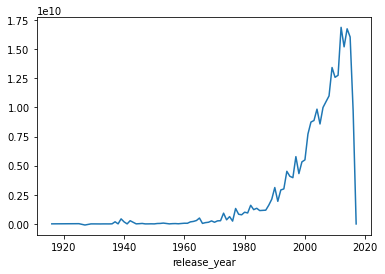

In [56]:
profit_per_year.plot()

<AxesSubplot:xlabel='release_year'>

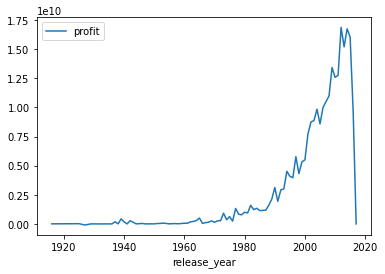

In [65]:
profit_per_year.reset_index().plot(x="release_year", y="profit")

<AxesSubplot:xlabel='release_year'>

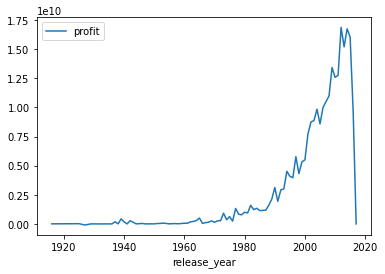

In [74]:
movies.groupby("release_year").agg({"profit": "sum"}).plot()

## Q4 — Trouver le film qui a été le plus profitable

In [79]:
movies[movies["profit"] == movies["profit"].max()]["title"]

0    Avatar
Name: title, dtype: object

In [82]:
movies.sort_values("profit", ascending=False)["title"].head(1)

0    Avatar
Name: title, dtype: object

# Q5 — Quel est le mot le plus présent dans les descriptions

In [20]:
all_words = movies["overview"].dropna().str.lower().str.split().sum()

In [21]:
import nltk
from nltk.corpus import stopwords

In [22]:
# nltk.download('stopwords')

In [23]:
words_series = pd.Series(all_words)

In [100]:
words_series[~words_series.isin(stopwords.words('english'))].value_counts()

new            708
one            647
young          615
life           563
two            531
              ... 
why,             1
tessa            1
quietly,         1
quayle           1
herzlinger,      1
Length: 34123, dtype: int64

## Q6 — Afficher une diagramme des langues de sortie des films

<AxesSubplot:ylabel='original_language'>

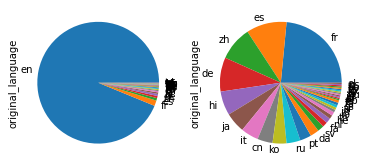

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

movies["original_language"].value_counts().plot(kind="pie", ax=ax[0])
(
    movies
    [movies["original_language"] != 'en']
    ["original_language"]
    .value_counts().plot(kind="pie", ax=ax[1])
)

## Q10 — Dans combien de film a joué Brad Pitt ?

In [12]:
url = "https://raw.githubusercontent.com/Bl3f/amse2021/main/The%20movie%20database/tmdb_5000_credits.csv"
credits = pd.read_csv(url)

In [18]:
s = '{"cast_id": 242, "character": "Jake Sully"}'

In [23]:
import json
json.loads(s)

{'cast_id': 242, 'character': 'Jake Sully'}

In [27]:
json.loads(credits["cast"][0])

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [29]:
# JSON
# {"name": "Christophe"}     --->    '{"name": "Christophe"}'
#                        json.dumps
#    
#                          <-----
#                        json.loads

In [ ]:
# En pandas []
# -> selectionner des colonnes ou filtrer des lignes

# Parallèle SQL
# SELECT name, price
# FROM fruits
# WHERE price > 10

# En pandas
# fruits   [["name", "price"]]    [fruits["price"] > 10]
#          ^--- select cols       ^---- where price > 10
# ^- df    ^- df                  ^- df

In [34]:
movies

pandas.core.frame.DataFrame

In [44]:
class Voiture:
    couleur = 'grise'
    lat = 0
    lon = 0
    
    def avancer(self):
        self.lat += 1
        self.lon += 1

In [45]:
fiat = Voiture()

In [46]:
fiat.couleur

'grise'

In [47]:
fiat.avancer()

In [48]:
fiat.avancer()

In [49]:
fiat.avancer()

In [58]:
len(credits[credits["cast"].str.contains("Brad Pitt")])

38

In [60]:
credits["cast"].str.contains("Brad Pitt").sum()

38

In [62]:
credits[credits["cast"].str.contains("Brad Pitt")]["title"].to_list()

['World War Z',
 'The Curious Case of Benjamin Button',
 'Troy',
 'Happy Feet Two',
 'Megamind',
 "Ocean's Twelve",
 'Mr. & Mrs. Smith',
 'Spy Game',
 "The Devil's Own",
 "Ocean's Eleven",
 "Ocean's Thirteen",
 'Meet Joe Black',
 'Fury',
 'Inglourious Basterds',
 'Seven Years in Tibet',
 'Fight Club',
 'Sinbad: Legend of the Seven Seas',
 'Interview with the Vampire',
 'Moneyball',
 'Sleepers',
 'The Mexican',
 'Burn After Reading',
 'The Tree of Life',
 'Se7en',
 'Legends of the Fall',
 'The Assassination of Jesse James by the Coward Robert Ford',
 'Confessions of a Dangerous Mind',
 'The Big Short',
 'The Counselor',
 '12 Years a Slave',
 'Babel',
 'By the Sea',
 'Killing Them Softly',
 'Being John Malkovich',
 'True Romance',
 'Snatch',
 'Full Frontal',
 'Johnny Suede']

In [70]:
credits["actors"] = credits["cast"] \
    .apply(json.loads) \
    .apply(lambda x: [actor["name"] for actor in x])
#   ^--- ici on boucle sur les éléments de la liste et on garde
#        seulement le `name` de l'acteur

In [75]:
len(credits[credits["actors"].apply(lambda x: "Brad Pitt" in x)])

38

## Q11 — Quel a été le premier film d'Angelina Jolie

In [78]:
credits[credits["cast"].str.contains("Angelina Jolie")]

# on doit faire une jointure entre credits et movies
# en utilisant la colonne movie_id

,movie_id,title,cast,crew,actors
81,102651,Maleficent,"[{""cast_id"": 7, ""character"": ""Maleficent"", ""cr...","[{""credit_id"": ""52fe4a0cc3a36847f81b5c9f"", ""de...","[Angelina Jolie, Elle Fanning, Sharlto Copley,..."
112,1966,Alexander,"[{""cast_id"": 42, ""character"": ""Alexander"", ""cr...","[{""credit_id"": ""53943d0dc3a3684252000c2c"", ""de...","[Colin Farrell, Angelina Jolie, Val Kilmer, Ja..."
137,49444,Kung Fu Panda 2,"[{""cast_id"": 5, ""character"": ""Po (voice)"", ""cr...","[{""credit_id"": ""57deba7cc3a36813080070c8"", ""de...","[Jack Black, Angelina Jolie, Dustin Hoffman, G..."
151,2310,Beowulf,"[{""cast_id"": 24, ""character"": ""Beowulf / Golde...","[{""credit_id"": ""52fe434cc3a36847f8049c1b"", ""de...","[Ray Winstone, Angelina Jolie, Anthony Hopkins..."
152,140300,Kung Fu Panda 3,"[{""cast_id"": 4, ""character"": ""Po (voice)"", ""cr...","[{""credit_id"": ""596107c49251415a4008f021"", ""de...","[Jack Black, Bryan Cranston, Dustin Hoffman, A..."
181,9502,Kung Fu Panda,"[{""cast_id"": 3, ""character"": ""Po (voice)"", ""cr...","[{""credit_id"": ""52fe4500c3a36847f80b6cc5"", ""de...","[Jack Black, Dustin Hoffman, Angelina Jolie, J..."
188,27576,Salt,"[{""cast_id"": 45, ""character"": ""Evelyn Salt"", ""...","[{""credit_id"": ""536b7b400e0a2647c800c203"", ""de...","[Angelina Jolie, Liev Schreiber, Chiwetel Ejio..."
248,787,Mr. & Mrs. Smith,"[{""cast_id"": 19, ""character"": ""Jane Smith"", ""c...","[{""credit_id"": ""52fe4276c3a36847f8020875"", ""de...","[Angelina Jolie, Brad Pitt, Vince Vaughn, Adam..."
273,9679,Gone in Sixty Seconds,"[{""cast_id"": 1, ""character"": ""Randall 'Memphis...","[{""credit_id"": ""52fe451ac3a36847f80bc99f"", ""de...","[Nicolas Cage, Angelina Jolie, Giovanni Ribisi..."
295,37710,The Tourist,"[{""cast_id"": 13, ""character"": ""Frank Tupelo"", ...","[{""credit_id"": ""537e0a4d0e0a2624c70021da"", ""de...","[Johnny Depp, Angelina Jolie, Paul Bettany, Ti..."


In [80]:
joined = movies.merge(credits, left_on="id", right_on="movie_id")

In [87]:
joined[joined["cast"].str.contains("Angelina Jolie")] \
    .sort_values("release_date")[["title_x", "release_date"]].head(1)

,title_x,release_date
1281,Hackers,1995-09-14


In [91]:
A = pd.DataFrame({"id": [1, 2, 3], "name": ["Avatar", "Batman", "Avengers"]})
B = pd.DataFrame({"movie_id": [1, 2], "budget": [1000, 2000]})

In [92]:
A

,id,name
0,1,Avatar
1,2,Batman
2,3,Avengers


In [93]:
B

,movie_id,budget
0,1,1000
1,2,2000


In [97]:
A.merge(B, left_on="id", right_on="movie_id", how="left")

,id,name,movie_id,budget
0,1,Avatar,1.0,1000.0
1,2,Batman,2.0,2000.0
2,3,Avengers,NaN,NaN


In [ ]:
# SQL
# SELECT A.*, B.*
# FROM A
# LEFT JOIN B ON A.id = B.movie_id

# Excel -> recherchev / vlookup

In [98]:
A

,id,name
0,1,Avatar
1,2,Batman
2,3,Avengers


In [99]:
B

,movie_id,budget
0,1,1000
1,2,2000


In [102]:
pd.concat([A, B], axis=0)

,id,name,movie_id,budget
0,1.0,Avatar,NaN,NaN
1,2.0,Batman,NaN,NaN
2,3.0,Avengers,NaN,NaN
0,NaN,NaN,1.0,1000.0
1,NaN,NaN,2.0,2000.0


In [103]:
pd.concat([A, B], axis=1)

,id,name,movie_id,budget
0,1,Avatar,1.0,1000.0
1,2,Batman,2.0,2000.0
2,3,Avengers,NaN,NaN


## Q7 — quels sont les pays qui ont produit le plus de films

In [104]:
movies["production_countries"].apply(json.loads)

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4802, dtype: object